In [21]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>


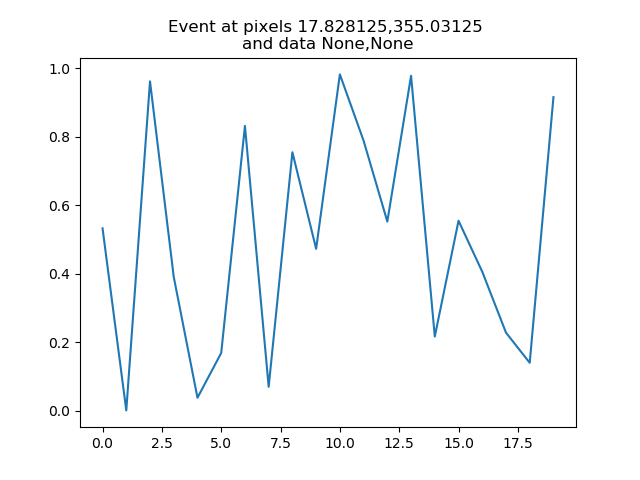

8

In [22]:
f1 = plt.figure(1)

data = np.random.rand(20)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)#connecting to listener 

In [23]:
from random import shuffle

origins = ['China', 'Brazil', 'Russia','UK','Canada']
shuffle(origins)

dftest = pd.DataFrame({'height': np.random.rand(5),
                       'weight': np.random.rand(5),
                       'origin': origins})

dftest

,height,origin,weight
0,0.733043,Russia,0.790446
1,0.921838,Brazil,0.775641
2,0.756564,China,0.011977
3,0.125778,Canada,0.550448
4,0.617994,UK,0.860068


<IPython.core.display.Javascript object>


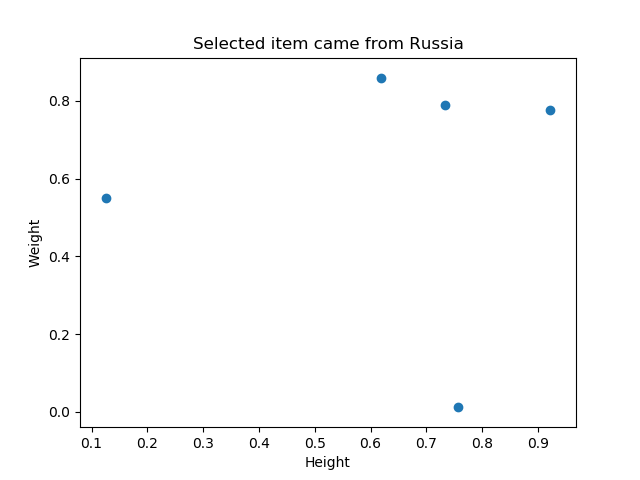

Text(0.5,0,'Height')

In [24]:
f2 = plt.figure(2)

plt.scatter(dftest['height'], dftest['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [25]:
def onpick(event):
    origin = dftest.iloc[event.ind[0]]['origin'] #nd[0] returns the index of the data point (i.e. its location in the list) nearest to where the mouse was clicked
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

8

In [46]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [47]:
dfdscr = (df.T).describe()
dfdscr.loc['StdError'] = (dfdscr.loc['std'])/((dfdscr.loc['count'])**0.5)
dfdscr.loc['MarginOfError'] = dfdscr.loc['StdError']*1.96*2# That means the 95% confidence interval (using the +/-1.96 C factor)
dfdscr

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044
StdError,3320.866311,1628.701180,2323.419534,1155.026400
MarginOfError,13017.795940,6384.508627,9107.804574,4527.703489


<IPython.core.display.Javascript object>


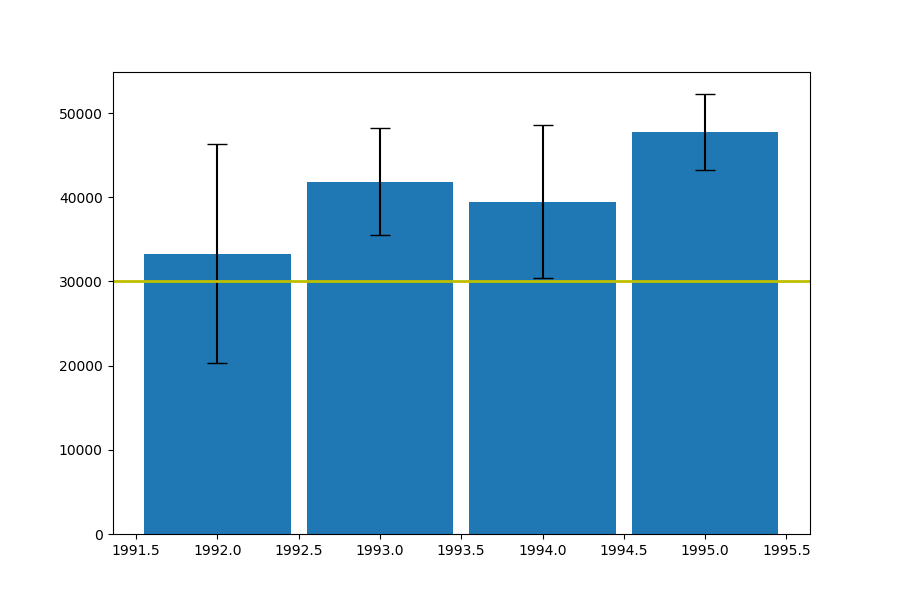

In [48]:
f3 = plt.figure(figsize=(9,6))

meanval = dfdscr.loc['mean'].values
meanval = meanval.tolist()
MarginOfError = dfdscr.loc['MarginOfError'].values
MarginOfError = MarginOfError.tolist()

plt.bar(list(dfdscr),meanval, width = 0.9)
plt.errorbar(list(dfdscr), meanval, yerr=MarginOfError, xerr=None, fmt='None', ecolor='black', elinewidth=None, capsize=7, barsabove=False 
          ,lolims=False, xlolims=False, xuplims=False, errorevery=1, dash_capstyle = 'round', capthick=1)

plt.axhline(y=30000, xmin=0, xmax=1, linewidth=2, color='y')

In [49]:
f3

def onclick(event):
    plt.cla()
    plt.plot(f3)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)#connecting to listener 
